### Grid Search with Cross-Validation

In [2]:
###### Load the preprocessed Datasets

%run src/preprocessing-final.py

In [2]:
###### Display Dataframes currently loaded

%whos DataFrame

Variable    Type         Data/Info
----------------------------------
dataset_1   DataFrame          MSSubClass_20  MSSu<...>[1444 rows x 382 columns]
dataset_2   DataFrame          MSSubClass_20  MSSu<...>[1444 rows x 390 columns]
dataset_3   DataFrame          LotFrontage   LotAr<...>[1444 rows x 382 columns]
dataset_4   DataFrame          LotFrontage   LotAr<...>[1444 rows x 390 columns]


In [3]:
###### Import the Python Numerical Stack

import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns

In [4]:
###### Import metrics from Scikit-Learn 

from sklearn.metrics import r2_score, mean_squared_error, mean_absolute_error

In [4]:
###### Suppress Warnings

import warnings
warnings.filterwarnings('ignore')

In [6]:
###### Load Grid Search Cross-Validator 

from sklearn.model_selection import GridSearchCV

In [11]:
###### Import Linear Models

from sklearn.linear_model import Lasso, Ridge, SGDRegressor
from sklearn.svm import LinearSVR, SVR, SVC

http://scikit-learn.org/stable/tutorial/machine_learning_map/index.html

<img src="https://www.evernote.com/l/AAEeKAnYmjFJX7GnDLsoUChT8idXE1JrFiIB/image.png">

#### Most Appropriate Estimators

In [8]:
###### Define Grid Search parameters for four models

gs_param_lasso = {
    'alpha' : np.logspace(-1,5,7)
}

gs_param_ridge = {
    'alpha' : np.logspace(-1,5,7)
}

gs_param_sgd = {
    'penalty' : ['l1', 'l2'],
    'alpha' : np.logspace(-1,5,7)
}

gs_param_linear_svr = {
    'C' : np.logspace(-5, 5, 7)
    
}

In [9]:
###### Define Grid Search models

lasso_grid_search = GridSearchCV(
    Lasso(),
    param_grid=gs_param_lasso,
    n_jobs=-1
)

ridge_grid_search = GridSearchCV(
    Ridge(),
    param_grid=gs_param_ridge,
    n_jobs=-1
)

sgd_grid_search = GridSearchCV(
    SGDRegressor(),
    param_grid=gs_param_ridge,
    n_jobs=-1
)

linearsvr_grid_search = GridSearchCV(
    LinearSVR(),
    param_grid=gs_param_linear_svr,
    n_jobs=-1
)

In [10]:
###### Perform fit on Dataset 2

lasso_grid_search.fit(dataset_2, target_2)
ridge_grid_search.fit(dataset_2, target_2)
sgd_grid_search.fit(dataset_2, target_2)
linearsvr_grid_search.fit(dataset_2, target_2)

GridSearchCV(cv=None, error_score='raise',
       estimator=LinearSVR(C=1.0, dual=True, epsilon=0.0, fit_intercept=True,
     intercept_scaling=1.0, loss='epsilon_insensitive', max_iter=1000,
     random_state=None, tol=0.0001, verbose=0),
       fit_params=None, iid=True, n_jobs=-1,
       param_grid={'C': array([  1.00000e-05,   4.64159e-04,   2.15443e-02,   1.00000e+00,
         4.64159e+01,   2.15443e+03,   1.00000e+05])},
       pre_dispatch='2*n_jobs', refit=True, return_train_score='warn',
       scoring=None, verbose=0)

In [12]:
###### Retrieve Best Estimator from Grid Search models

best_lasso = lasso_grid_search.best_estimator_
best_ridge = ridge_grid_search.best_estimator_
best_sgd = sgd_grid_search.best_estimator_
best_linearsvr = linearsvr_grid_search.best_estimator_

In [13]:
best_ridge

Ridge(alpha=10.0, copy_X=True, fit_intercept=True, max_iter=None,
   normalize=False, random_state=None, solver='auto', tol=0.001)

In [14]:
best_lasso

Lasso(alpha=100.0, copy_X=True, fit_intercept=True, max_iter=1000,
   normalize=False, positive=False, precompute=False, random_state=None,
   selection='cyclic', tol=0.0001, warm_start=False)

In [15]:
best_linearsvr

LinearSVR(C=2154.4346900318865, dual=True, epsilon=0.0, fit_intercept=True,
     intercept_scaling=1.0, loss='epsilon_insensitive', max_iter=1000,
     random_state=None, tol=0.0001, verbose=0)

In [16]:
best_sgd

SGDRegressor(alpha=0.10000000000000001, average=False, epsilon=0.1, eta0=0.01,
       fit_intercept=True, l1_ratio=0.15, learning_rate='invscaling',
       loss='squared_loss', max_iter=None, n_iter=None, penalty='l2',
       power_t=0.25, random_state=None, shuffle=True, tol=None, verbose=0,
       warm_start=False)

In [17]:
###### Display Best Scores from Grid Search models

(lasso_grid_search.best_score_,
 ridge_grid_search.best_score_,
 sgd_grid_search.best_score_,
 linearsvr_grid_search.best_score_)

(0.89403721260739477,
 0.88839030757234749,
 0.85018593475934334,
 0.8802845170990975)

In [18]:
###### Display best model

best_lasso

Lasso(alpha=100.0, copy_X=True, fit_intercept=True, max_iter=1000,
   normalize=False, positive=False, precompute=False, random_state=None,
   selection='cyclic', tol=0.0001, warm_start=False)

#### Next Level

In [19]:
###### Import kernel enabled support vector machine

from sklearn.svm import SVR

In [5]:
###### Import ensemble models

from sklearn.ensemble import (AdaBoostRegressor,
                              GradientBoostingRegressor,
                              RandomForestRegressor)

In [6]:
###### Define Grid Search parameters for four models

gs_param_svr = {
    'kernel' : ['rbf'],
    'C' : np.logspace(-5, 5, 7)
}

gs_param_adaboost = {
    
}

gs_param_gradboost = {
    'max_depth' : [1,2,3,4,5],
    'max_features' : ['sqrt', 'auto', 'log2']
}

gs_param_random_forest = {   
    'n_estimators' : [10,20,50,100],
    'max_features' : ['sqrt', 'auto', 'log2']
}

In [22]:
###### Define Grid Search models

svr_grid_search = GridSearchCV(
    SVR(),
    param_grid=gs_param_svr,
    n_jobs=-1
)

adaboost_grid_search = GridSearchCV(
    AdaBoostRegressor(), 
    param_grid=gs_param_adaboost, 
    n_jobs=-1
)

gradboost_grid_search = GridSearchCV(
    GradientBoostingRegressor(),
    param_grid=gs_param_gradboost,
    n_jobs=-1
)

random_forest_grid_search = GridSearchCV(
    RandomForestRegressor(),
    param_grid=gs_param_random_forest,
    n_jobs=-1
)

In [23]:
###### Perform fit on Dataset 2

svr_grid_search.fit(dataset_2, target_2)
adaboost_grid_search.fit(dataset_2, target_2)
gradboost_grid_search.fit(dataset_2, target_2)
random_forest_grid_search.fit(dataset_2, target_2)

GridSearchCV(cv=None, error_score='raise',
       estimator=RandomForestRegressor(bootstrap=True, criterion='mse', max_depth=None,
           max_features='auto', max_leaf_nodes=None,
           min_impurity_decrease=0.0, min_impurity_split=None,
           min_samples_leaf=1, min_samples_split=2,
           min_weight_fraction_leaf=0.0, n_estimators=10, n_jobs=1,
           oob_score=False, random_state=None, verbose=0, warm_start=False),
       fit_params=None, iid=True, n_jobs=-1,
       param_grid={'n_estimators': [10, 20, 50, 100], 'max_features': ['sqrt', 'auto', 'log2']},
       pre_dispatch='2*n_jobs', refit=True, return_train_score='warn',
       scoring=None, verbose=0)

In [24]:
###### Display score for gradient boosted model

gradboost_grid_search.best_score_

0.89917980524703134

In [25]:
###### Import pickle library

import pickle

In [26]:
###### Import `joblib` from Scikit-Learn

from sklearn.externals import joblib

In [27]:
###### Use `joblib` to export best Lasso model

joblib.dump(best_lasso, 'best_lasso.p')

['best_lasso.p']

In [28]:
###### Use `joblib` to load best Lasso model

lasso_model = joblib.load('best_lasso.p')

In [29]:
###### Retrieve Best Estimator from Grid Search models

best_svr = svr_grid_search.best_estimator_
best_adaboost = adaboost_grid_search.best_estimator_
best_gradboost = gradboost_grid_search.best_estimator_
best_random_forest = random_forest_grid_search.best_estimator_

In [30]:
###### Display Best Scores from Grid Search models

(svr_grid_search.best_score_,
 adaboost_grid_search.best_score_,
 gradboost_grid_search.best_score_,
 random_forest_grid_search.best_score_)

(0.85965192186105299,
 0.81063365281284472,
 0.89917980524703134,
 0.86191183641570013)

In [26]:
###### Display best model scores

lasso_grid_search.best_score_, gradboost_grid_search.best_score_

(0.89400639458492726, 0.89929462910866398)

In [16]:
gradboost_grid_search.fit(dataset_4, target_4)

GridSearchCV(cv=None, error_score='raise',
       estimator=GradientBoostingRegressor(alpha=0.9, criterion='friedman_mse', init=None,
             learning_rate=0.1, loss='ls', max_depth=3, max_features=None,
             max_leaf_nodes=None, min_impurity_decrease=0.0,
             min_impurity_split=None, min_samples_leaf=1,
             min_samples_split=2, min_weight_fraction_leaf=0.0,
             n_estimators=100, presort='auto', random_state=None,
             subsample=1.0, verbose=0, warm_start=False),
       fit_params=None, iid=True, n_jobs=-1,
       param_grid={'max_depth': [1, 2, 3, 4, 5], 'max_features': ['sqrt', 'auto', 'log2']},
       pre_dispatch='2*n_jobs', refit=True, return_train_score='warn',
       scoring=None, verbose=0)

In [27]:
gradboost_grid_search = GridSearchCV(
    GradientBoostingRegressor(),
    cv=3,    
    param_grid=gs_param_gradboost,
    n_jobs=-1
)
gradboost_grid_search.fit(dataset_4, target_4)
gradboost_grid_search.best_score_

0.90183922234484315

In [28]:
results = pd.DataFrame(gradboost_grid_search.cv_results_)

In [29]:
results['colors'] = pd.Series([
    'red', 'moccasin', 'gold',
    'blue', 'yellow', 'green',
    'black', 'purple', 'cyan',
    'teal', 'magenta', 'lavenderblush',
    'deepskyblue', 'brown', 'coral'
])

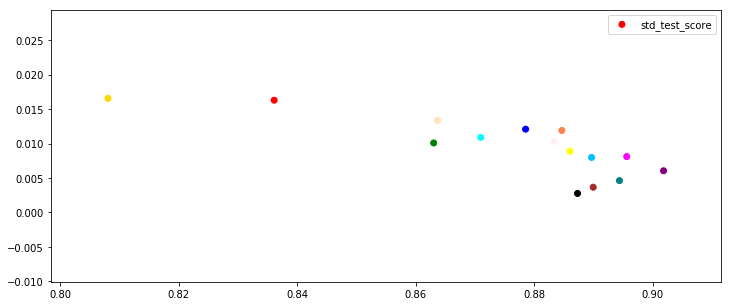

In [30]:
plt.figure(figsize=(12,5))

plt.scatter(results['mean_test_score'], 
            results['std_test_score'],
            c=results['colors'])
plt.legend()

#### Neural Network

In [27]:
###### Import multilayer perceptron model

from sklearn.neural_network import MLPRegressor

In [28]:
###### Define grid search parameters

gs_param_nn = {
    'hidden_layer_sizes' : [
        (8, ), (4,4), (2,2,2)
    ],
    'alpha' : np.logspace(-3,3,7)
}

In [29]:
###### Define grid search model

nn_grid_search = GridSearchCV(MLPRegressor(), param_grid=gs_param_nn, n_jobs=-1)

In [30]:
###### Fit model

nn_grid_search.fit(dataset_2, target_2)

GridSearchCV(cv=None, error_score='raise',
       estimator=MLPRegressor(activation='relu', alpha=0.0001, batch_size='auto', beta_1=0.9,
       beta_2=0.999, early_stopping=False, epsilon=1e-08,
       hidden_layer_sizes=(100,), learning_rate='constant',
       learning_rate_init=0.001, max_iter=200, momentum=0.9,
       nesterovs_momentum=True, power_t=0.5, random_state=None,
       shuffle=True, solver='adam', tol=0.0001, validation_fraction=0.1,
       verbose=False, warm_start=False),
       fit_params=None, iid=True, n_jobs=-1,
       param_grid={'hidden_layer_sizes': [(8,), (4, 4), (2, 2, 2)], 'alpha': array([  1.00000e-03,   1.00000e-02,   1.00000e-01,   1.00000e+00,
         1.00000e+01,   1.00000e+02,   1.00000e+03])},
       pre_dispatch='2*n_jobs', refit=True, return_train_score='warn',
       scoring=None, verbose=0)

In [31]:
###### Display best neural network score
nn_grid_search.best_score_

-4.9890829237619414